<a href="https://colab.research.google.com/github/2ToTheNthPower/CodeCompletion/blob/main/Code_Completion_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Setup imports and connect drive as data source to download data to

In [ ]:
#Importing libraries
import numpy as np
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM, SimpleRNN, Embedding
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt


import tensorflow as tf
import pandas as pd
import tokenize, glob
import os, re, requests, tarfile, shutil, json, glob # For file manipualation only.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%tensorflow_version 2.x
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.8.0
Running on TPU  ['10.40.237.178:8470']
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.40.237.178:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.40.237.178:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
!wget https://dax-cdn.cdn.appdomain.cloud/dax-project-codenet/1.0.0/Project_CodeNet.tar.gz

In [ ]:
!tar -xvf /content/Project_CodeNet.tar.gz  --directory /content/drive/MyDrive/code_completion_data/ --wildcards --no-anchored '*.py' 


# Step 2: Generate Tokens from the downloaded data

In [ ]:
# Experiment with tokenize library to see its use
with tokenize.open('/content/drive/MyDrive/code_completion_data/Project_CodeNet_Mini/data/p00002/Python/s005515634.py') as f:
    tokens = tokenize.generate_tokens(f.readline)
    for token in tokens:
        print(token)

TokenInfo(type=1 (NAME), string='while', start=(1, 0), end=(1, 5), line='while True:\n')
TokenInfo(type=1 (NAME), string='True', start=(1, 6), end=(1, 10), line='while True:\n')
TokenInfo(type=53 (OP), string=':', start=(1, 10), end=(1, 11), line='while True:\n')
TokenInfo(type=4 (NEWLINE), string='\n', start=(1, 11), end=(1, 12), line='while True:\n')
TokenInfo(type=5 (INDENT), string='    ', start=(2, 0), end=(2, 4), line='    try:\n')
TokenInfo(type=1 (NAME), string='try', start=(2, 4), end=(2, 7), line='    try:\n')
TokenInfo(type=53 (OP), string=':', start=(2, 7), end=(2, 8), line='    try:\n')
TokenInfo(type=4 (NEWLINE), string='\n', start=(2, 8), end=(2, 9), line='    try:\n')
TokenInfo(type=5 (INDENT), string='        ', start=(3, 0), end=(3, 8), line='        a, b = map(int, input().split())\n')
TokenInfo(type=1 (NAME), string='a', start=(3, 8), end=(3, 9), line='        a, b = map(int, input().split())\n')
TokenInfo(type=53 (OP), string=',', start=(3, 9), end=(3, 10), line=' 

In [ ]:
all_files = glob.glob('/content/drive/MyDrive/code_completion_data/Project_CodeNet/data/*/Python/*.py')
print(len(all_files))
np.savetxt('/content/drive/MyDrive/code_completion_data/Project_CodeNet/all_py_files.txt', X = all_files, delimiter=',', comments='', fmt='%s')

In [ ]:
all_files_mini = glob.glob('/content/drive/MyDrive/code_completion_data/Project_CodeNet_Mini/data/*/Python/*.py')
np.savetxt('/content/drive/MyDrive/code_completion_data/Project_CodeNet_Mini/all_py_files.txt', X = all_files_mini, delimiter=',', comments='', fmt='%s')
len(all_files_mini)

In [ ]:
def tokenize_and_save(dir_name):
  tokenizerD = Tokenizer(
    num_words=10000,
    filters='',
    lower=False, split=' ', char_level=False, oov_token="<UNK>",
    document_count=0
  )
  
  # Assumes a file with all_py_files.txt name
  file_index = 1
  # with open(dir_name + 'all_py_files.txt') as dir_f:
  #   for py_file in dir_f.readlines():
  for py_file in all_files:
    file_index = file_index + 1
    with tokenize.open(py_file.strip()) as f:
      try:
        tokens = [tok.string for tok in tokenize.generate_tokens(f.readline)]
        tokenizerD.fit_on_texts(tokens)
      except:
        pass 

      if file_index % 2000 == 0:
        print(str(file_index) + " python files tokenized with #tokens: " + str(len(tokenizerD.word_index)))
        tokenizer_json = tokenizerD.to_json()
        with open(dir_name + 'tokenizer.json', 'w') as f:
          json.dump(tokenizer_json, f)

  # Save final version
  tokenizer_json = tokenizerD.to_json()
  with open(dir_name + 'tokenizer.json', 'w') as f:
    json.dump(tokenizer_json, f)

  print('Total tokenizer vocabulary {}'.format(len(tokenizerD.word_index)))


tokenize_and_save('/content/drive/MyDrive/code_completion_data/Project_CodeNet_Mini/')

In [ ]:
tokenize_and_save('/content/drive/MyDrive/code_completion_data/Project_CodeNet/')

In [ ]:
#Load tokens into 'tokenizer' file. Total tokens created is 213461

path_full = "drive/MyDrive/code_completion_data/Project_CodeNet/tokenizer_full_case_sensitive.json"
# path_full = "drive/MyDrive/code_completion_data/samples/tokenizer.json"

with open(path_full) as f:
  json_string = json.load(f)

tokenizer = keras.preprocessing.text.tokenizer_from_json(
    json_string
)
len(tokenizer.word_index)


In [ ]:
with open('/content/drive/MyDrive/code_completion_data/Project_CodeNet_Mini/tokenizer.json') as f:
  json_string = json.load(f)

tokenizer_mini = keras.preprocessing.text.tokenizer_from_json(
    json_string
)

len(tokenizer_mini.word_index)

# Step 3: Generate input and output data for training and testing using tokens

In [ ]:
# files is a list of python files to generate vector on
def vectorize_and_save(files):
  # Load tokenizer
  with open("drive/MyDrive/code_completion_data/Project_CodeNet/tokenizer.json") as f:
    json_string = json.load(f)

  tokenizer = keras.preprocessing.text.tokenizer_from_json(
      json_string
  )
  
  seq_length = 10
  header_str = "X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y"
  file_index = 1
  py_file_index = 1
  dataX = []
  n_patterns = 0
  max_rows_in_each_file = 10000000
  for py_file in files:
    with tokenize.open(py_file.strip()) as f:
      try:
        py_file_index = py_file_index + 1
        py_tokens = [tok.string for tok in tokenize.generate_tokens(f.readline)]
        # Now convert the python tokens into an array of tokens from our Corpus tokenizer

        words_tokens = [0]*seq_length + [tokenizer.word_index[w] if w in tokenizer.word_index else tokenizer.word_index['<UNK>'] for w in py_tokens] # Get token id if exists else use <UNK>

        for j in range(len(words_tokens) - seq_length):
          dataX.append(words_tokens[j:j+seq_length+1])

        # Save to file if data reaches max count or if its the last row.
        if len(dataX) >= max_rows_in_each_file:
          file_name = '/content/drive/MyDrive/code_completion_data/samples/data_10/dataxy_10_1_{}.csv'.format(file_index)
          np.savetxt(fname = file_name, 
                    X = dataX, 
                    delimiter=',', 
                    comments='',
                    fmt='%d',
                    header=header_str)
          n_patterns = n_patterns + len(dataX)
          dataX = []
          file_index = file_index + 1
          print("Saved to file " + file_name)

        if py_file_index % 2000 == 0:
          print("Processed files {} with dataset size {}".format(py_file_index, n_patterns + len(dataX)))
      except:
        pass 

  # Save once more for left items unsaved
  file_name = '/content/drive/MyDrive/code_completion_data/samples/data_10/dataxy_10_1_{}.csv'.format(file_index)
  np.savetxt(fname = file_name, 
            X = dataX, 
            delimiter=',', 
            comments='',
            fmt='%d',
            header=header_str)
  n_patterns = n_patterns + len(dataX)
  
  print("Saved to file " + file_name)

  print ("Total Patterns: ", n_patterns)

      

In [ ]:
py_files = glob.iglob('/content/drive/MyDrive/code_completion_data/Project_CodeNet_Mini/data/*/Python/*.py')
vectorize_and_save(py_files)

In [ ]:
# Now generate on entire dataset full
py_files = glob.iglob('/content/drive/MyDrive/code_completion_data/Project_CodeNet/data/*/Python/*.py')
vectorize_and_save(py_files)

In [ ]:
# import csv

# lines_count = []
# for file_index in range(1, 26):
#   file_name = path+'data_10/dataxy_10_{}.csv'.format(file_index)
#   file = open(file_name)
#   reader = csv.reader(file)
#   lines= len(list(reader))
#   lines_count.append([file_name, lines])

In [ ]:
# lines_count1 = []
# for l in lines_count:
#   lines_count1.append([l[0], str(l[1])])

# np.savetxt(fname = path + '/data_l5/lines_count.csv', 
#                X = lines_count1, 
#                delimiter=',', 
#                comments='',
#                fmt='%s',
#                header='file,lines')

# lines_count1

In [ ]:
class CompletionDataGenerator(keras.utils.Sequence) :

  def __init__(self, files_list, batch_size) :
    self.files_list = pd.read_csv(files_list, header = 0)
    self.files_list['lines'] = self.files_list['lines'].astype('int')
    self.batch_size = batch_size
    self.total_count = self.files_list['lines'].sum()
    print('Loaded data generator with total lines {} and details:'.format(self.total_count))
    display(self.files_list)
    
    
  def __len__(self) :
    return (np.ceil(self.total_count / float(self.batch_size))).astype(np.int)
  
  
  def __getitem__(self, idx) :
    batch_x = self.image_filenames[idx * self.batch_size : (idx+1) * self.batch_size]
    batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]
    
    return None

CompletionDataGenerator(path + '/data_l5/lines_count.csv', 64)

In [ ]:
# Above can help with large scale traing but lets focus on one file for now
dataxy = pd.read_csv('/content/drive/MyDrive/code_completion_data/samples/data_10/dataxy_10_1.csv', header = 0)
display(dataxy)
dataX = dataxy.iloc[:, 0:10].values
dataY = dataxy.iloc[:, 10].values

print(dataX)
print(dataY)

In [ ]:
tokenizer.word_index

# Step 4: Train the actual model

In [ ]:
print(dataX.shape)
print(dataY.shape)
print(len(np.unique(dataY)))
# Lets build model
vocab_size_to_predict = len(tokenizer.word_index)+1

model = Sequential()
model.add(Embedding(input_dim=vocab_size_to_predict, output_dim=32, mask_zero=True))
model.add(LSTM(256, input_shape=(dataX.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(units = vocab_size_to_predict, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True)

In [ ]:
## 9. Train and save the best model on Data here
filepath = "LSTM_model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, 
                             save_best_only=True, mode='min')
history = model.fit(dataX, dataY, epochs=20, batch_size=64, callbacks=[checkpoint])

In [ ]:
# Rerun with full dataset
print(dataX.shape)
print(dataY.shape)
print(len(np.unique(dataY)))
# Lets build model
vocab_size_to_predict = len(tokenizer.word_index)+1

model1 = Sequential()
model1.add(Embedding(input_dim=vocab_size_to_predict, output_dim=32, mask_zero=True))
model1.add(LSTM(256, input_shape=(dataX.shape[1], 1)))
model1.add(Dropout(0.2))
model1.add(Dense(units = vocab_size_to_predict, activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
tf.keras.utils.plot_model(model1, show_shapes=True, show_layer_activations=True)

In [ ]:
## 9. Train and save the best model on full Data here
filepath = "/content/drive/MyDrive/code_completion_data/LSTM_model_full.hdf5"
checkpoint1 = ModelCheckpoint(filepath, monitor='loss', verbose=1, 
                             save_best_only=True, mode='min')
history1 = model1.fit(dataX, dataY, epochs=20, batch_size=128, callbacks=[checkpoint1])

Epoch 1/20
1018/1019 [============================>.] - ETA: 0s - loss: 0.3599 - accuracy: 0.8877
Epoch 1: loss improved from inf to 0.35984, saving model to /content/drive/MyDrive/code_completion_data/LSTM_model_full.hdf5
1019/1019 [==============================] - 54s 51ms/step - loss: 0.3598 - accuracy: 0.8877
Epoch 2/20
1019/1019 [==============================] - ETA: 0s - loss: 0.3501 - accuracy: 0.8910
Epoch 2: loss improved from 0.35984 to 0.35013, saving model to /content/drive/MyDrive/code_completion_data/LSTM_model_full.hdf5
1019/1019 [==============================] - 47s 46ms/step - loss: 0.3501 - accuracy: 0.8910
Epoch 3/20
1018/1019 [============================>.] - ETA: 0s - loss: 0.3546 - accuracy: 0.8905
Epoch 3: loss did not improve from 0.35013
1019/1019 [==============================] - 46s 45ms/step - loss: 0.3546 - accuracy: 0.8905
Epoch 4/20
1019/1019 [==============================] - ETA: 0s - loss: 0.3561 - accuracy: 0.8909
Epoch 4: loss did not improve fr

# Build and plot of Mini Dataset

In [ ]:
with open('/content/drive/MyDrive/code_completion_data/Project_CodeNet_Mini/tokenizer.json') as f:
  json_string = json.load(f)

tokenizer= keras.preprocessing.text.tokenizer_from_json(
    json_string
)

print(len(tokenizer.word_index))
tokenizer.word_index

1951


{'<UNK>': 1,
 '\n': 2,
 '(': 3,
 ')': 4,
 '=': 5,
 ':': 6,
 ',': 7,
 '.': 8,
 '[': 9,
 ']': 10,
 'i': 11,
 'a': 12,
 'x': 13,
 'print': 14,
 'input': 15,
 'y': 16,
 '==': 17,
 'int': 18,
 'n': 19,
 '*': 20,
 'if': 21,
 '1': 22,
 '0': 23,
 'in': 24,
 'for': 25,
 's': 26,
 'b': 27,
 'w': 28,
 'h': 29,
 '2': 30,
 '-': 31,
 'split': 32,
 'r': 33,
 'ans': 34,
 'else': 35,
 'range': 36,
 'map': 37,
 '+': 38,
 '/': 39,
 'import': 40,
 'math': 41,
 '%': 42,
 'list': 43,
 'len': 44,
 '"': 45,
 'pi': 46,
 'str': 47,
 'def': 48,
 'l': 49,
 'append': 50,
 'and': 51,
 'return': 52,
 'elif': 53,
 'max': 54,
 'sys': 55,
 '+=': 56,
 '#': 57,
 'c': 58,
 "'1'": 59,
 'while': 60,
 'gcd': 61,
 '!=': 62,
 'float': 63,
 '"1"': 64,
 '""': 65,
 '>': 66,
 "'": 67,
 'join': 68,
 "''": 69,
 'm': 70,
 '<': 71,
 'stdin': 72,
 'min': 73,
 'format': 74,
 'true': 75,
 't': 76,
 'or': 77,
 'from': 78,
 'num': 79,
 'replace': 80,
 "'9'": 81,
 'reverse': 82,
 'self': 83,
 'main': 84,
 'raw_input': 85,
 'd': 86,
 'break'

In [ ]:
tokenizer.word_docs

{'import': 539,
 'sys': 317,
 '\n': 15548,
 'input': 1850,
 '=': 5633,
 '.': 2866,
 'stdin': 171,
 'readline': 97,
 'w': 1013,
 ',': 3666,
 'h': 1002,
 'x': 2121,
 'y': 1762,
 '(': 12046,
 'int': 1631,
 'i': 2144,
 ')': 12046,
 'for': 1215,
 'in': 1253,
 'split': 856,
 'if': 1503,
 '==': 1649,
 '/': 562,
 '2': 971,
 'and': 351,
 ':': 4523,
 'print': 2092,
 '*': 1576,
 '1': 1420,
 'else': 763,
 '0': 1389,
 '#': 282,
 '2019/06/16': 1,
 'contest': 3,
 'atcoder': 3,
 '130': 2,
 'beginner': 3,
 'c': 283,
 '-': 875,
 'map': 661,
 'case': 3,
 '"|"': 1,
 'lsq': 2,
 'rsq': 2,
 'wk1': 3,
 'min': 165,
 '"-"': 1,
 'usq': 2,
 'dsq': 2,
 'wk2': 3,
 'equal': 1,
 'ans2': 57,
 'ans1': 45,
 'max': 323,
 'or': 145,
 'elif': 343,
 '(w': 2,
 '(h': 1,
 'y)': 7,
 'x)': 1,
 'w:': 1,
 'h)': 2,
 'output': 9,
 'j': 121,
 'area': 68,
 'float': 221,
 "'{}": 12,
 "{}'": 15,
 'format': 161,
 'x1': 11,
 'x2': 7,
 'y1': 9,
 'y2': 7,
 'a': 2137,
 'b': 1045,
 '//': 96,
 'x_test': 4,
 'false': 32,
 'y_test': 4,
 '%': 436

In [ ]:
tokenizer.index_word

{1: '<UNK>',
 2: '\n',
 3: '(',
 4: ')',
 5: '=',
 6: ':',
 7: ',',
 8: '.',
 9: '[',
 10: ']',
 11: 'i',
 12: 'a',
 13: 'x',
 14: 'print',
 15: 'input',
 16: 'y',
 17: '==',
 18: 'int',
 19: 'n',
 20: '*',
 21: 'if',
 22: '1',
 23: '0',
 24: 'in',
 25: 'for',
 26: 's',
 27: 'b',
 28: 'w',
 29: 'h',
 30: '2',
 31: '-',
 32: 'split',
 33: 'r',
 34: 'ans',
 35: 'else',
 36: 'range',
 37: 'map',
 38: '+',
 39: '/',
 40: 'import',
 41: 'math',
 42: '%',
 43: 'list',
 44: 'len',
 45: '"',
 46: 'pi',
 47: 'str',
 48: 'def',
 49: 'l',
 50: 'append',
 51: 'and',
 52: 'return',
 53: 'elif',
 54: 'max',
 55: 'sys',
 56: '+=',
 57: '#',
 58: 'c',
 59: "'1'",
 60: 'while',
 61: 'gcd',
 62: '!=',
 63: 'float',
 64: '"1"',
 65: '""',
 66: '>',
 67: "'",
 68: 'join',
 69: "''",
 70: 'm',
 71: '<',
 72: 'stdin',
 73: 'min',
 74: 'format',
 75: 'true',
 76: 't',
 77: 'or',
 78: 'from',
 79: 'num',
 80: 'replace',
 81: "'9'",
 82: 'reverse',
 83: 'self',
 84: 'main',
 85: 'raw_input',
 86: 'd',
 87: 'br

In [ ]:
# Above can help with large scale traing but lets focus on one file for now
dataxy = pd.read_csv('/content/drive/MyDrive/code_completion_data/samples/data_10_mini/dataxy_10_1_1.csv', header = 0)
display(dataxy)
dataX = dataxy.iloc[:, 0:10].values
dataY = dataxy.iloc[:, 10].values

print(dataX)
print(dataY)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,0,0,0,0,0,0,0,0,0,0,40
1,0,0,0,0,0,0,0,0,0,40,55
2,0,0,0,0,0,0,0,0,40,55,2
3,0,0,0,0,0,0,0,40,55,2,15
4,0,0,0,0,0,0,40,55,2,15,5
...,...,...,...,...,...,...,...,...,...,...,...
130370,1,1,1,1,14,3,69,8,68,3,114
130371,1,1,1,14,3,69,8,68,3,114,4
130372,1,1,14,3,69,8,68,3,114,4,4
130373,1,14,3,69,8,68,3,114,4,4,1


[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0  40]
 [  0   0   0 ...   0  40  55]
 ...
 [  1   1  14 ...   3 114   4]
 [  1  14   3 ... 114   4   4]
 [ 14   3  69 ...   4   4   1]]
[40 55  2 ...  4  1  1]


(130375, 10)
(130375,)
1255


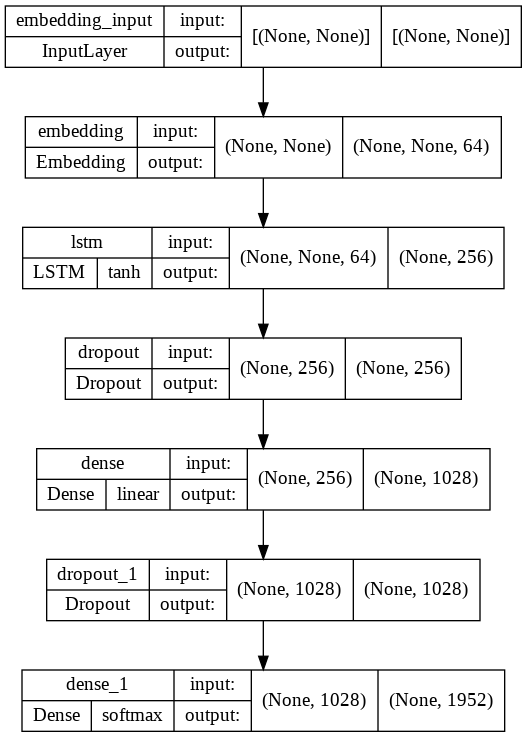

In [ ]:
# Rerun with mini dataset
print(dataX.shape)
print(dataY.shape)
print(len(np.unique(dataY)))
# Lets build model
vocab_size_to_predict = len(tokenizer.word_index)+1

model1 = Sequential()
model1.add(Embedding(input_dim=vocab_size_to_predict, output_dim=64, mask_zero=True))
model1.add(LSTM(256, input_shape=(dataX.shape[1], 1)))
model1.add(Dropout(0.01))
model1.add(Dense(1028))
model1.add(Dropout(0.01))
model1.add(Dense(units = vocab_size_to_predict, activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
tf.keras.utils.plot_model(model1, show_shapes=True, show_layer_activations=True)

In [ ]:
## 9. Train and save the best model on Mini Data here
filepath = "/content/drive/MyDrive/code_completion_data/LSTM_model_mini_18Apr2022.hdf5"
checkpoint1 = ModelCheckpoint(filepath, monitor='loss', verbose=1, 
                             save_best_only=True, mode='min')
history1 = model1.fit(dataX, dataY, epochs=40, batch_size=256, callbacks=[checkpoint1])

Epoch 1/40
509/510 [============================>.] - ETA: 0s - loss: 2.2377 - accuracy: 0.4976
Epoch 1: loss improved from inf to 2.23757, saving model to /content/drive/MyDrive/code_completion_data/LSTM_model_mini_18Apr2022.hdf5
510/510 [==============================] - 32s 62ms/step - loss: 2.2376 - accuracy: 0.4977
Epoch 2/40
509/510 [============================>.] - ETA: 0s - loss: 1.6425 - accuracy: 0.6110
Epoch 2: loss improved from 2.23757 to 1.64250, saving model to /content/drive/MyDrive/code_completion_data/LSTM_model_mini_18Apr2022.hdf5
510/510 [==============================] - 32s 63ms/step - loss: 1.6425 - accuracy: 0.6110
Epoch 3/40
509/510 [============================>.] - ETA: 0s - loss: 1.4237 - accuracy: 0.6515
Epoch 3: loss improved from 1.64250 to 1.42367, saving model to /content/drive/MyDrive/code_completion_data/LSTM_model_mini_18Apr2022.hdf5
510/510 [==============================] - 32s 63ms/step - loss: 1.4237 - accuracy: 0.6515
Epoch 4/40
509/510 [======

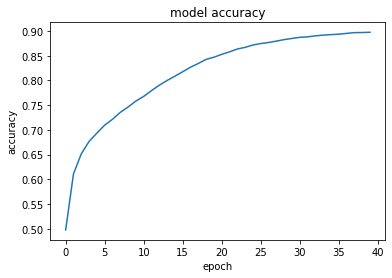

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history1.history['accuracy'])
# plt.plot(history1.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

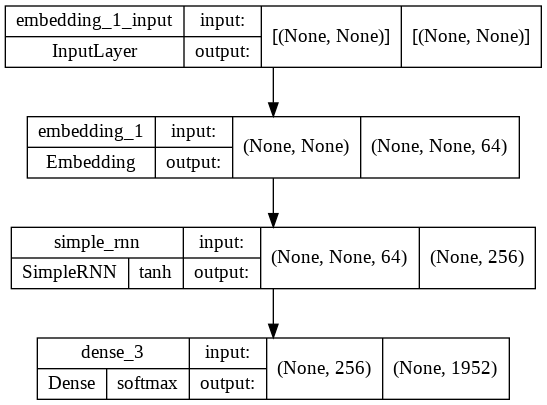

In [ ]:
model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size_to_predict, output_dim=64, mask_zero=True))
model2.add(SimpleRNN(256, input_shape=(dataX.shape[1], 1)))
model1.add(Dropout(0.01))
model1.add(Dense(1028))
model1.add(Dropout(0.01))
model2.add(Dense(units = vocab_size_to_predict, activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
tf.keras.utils.plot_model(model2, show_shapes=True, show_layer_activations=True)

In [ ]:
filepath = "/content/drive/MyDrive/code_completion_data/RNN_model_mini_18Apr2022.hdf5"
checkpoint2 = ModelCheckpoint(filepath, monitor='loss', verbose=1, 
                             save_best_only=True, mode='min')
history2 = model2.fit(dataX, dataY, epochs=40, batch_size=256, callbacks=[checkpoint2])

Epoch 1/40
509/510 [============================>.] - ETA: 0s - loss: 3.7168 - accuracy: 0.2453
Epoch 1: loss improved from inf to 3.71610, saving model to /content/drive/MyDrive/code_completion_data/RNN_model_mini_18Apr2022.hdf5
510/510 [==============================] - 16s 30ms/step - loss: 3.7161 - accuracy: 0.2453
Epoch 2/40
508/510 [============================>.] - ETA: 0s - loss: 2.4855 - accuracy: 0.4690
Epoch 2: loss improved from 3.71610 to 2.48443, saving model to /content/drive/MyDrive/code_completion_data/RNN_model_mini_18Apr2022.hdf5
510/510 [==============================] - 15s 30ms/step - loss: 2.4844 - accuracy: 0.4694
Epoch 3/40
509/510 [============================>.] - ETA: 0s - loss: 1.9689 - accuracy: 0.5642
Epoch 3: loss improved from 2.48443 to 1.96890, saving model to /content/drive/MyDrive/code_completion_data/RNN_model_mini_18Apr2022.hdf5
510/510 [==============================] - 15s 30ms/step - loss: 1.9689 - accuracy: 0.5642
Epoch 4/40
509/510 [=========

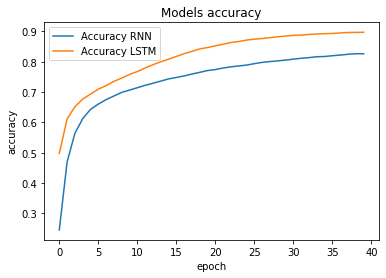

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history1.history['accuracy'])
plt.title('Models accuracy')
plt.legend(['Accuracy RNN', 'Accuracy LSTM'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
model1 = keras.models.load_model("/content/drive/MyDrive/code_completion_data/LSTM_model_mini.hdf5")

In [ ]:
model2 = keras.models.load_model("/content/drive/MyDrive/code_completion_data/RNN_model_mini.hdf5")

In [ ]:
y_p_lstm = model1.predict(dataX)
y_p_lstm = [np.argmax(y_softmax) for y_softmax in y_p_lstm]

In [ ]:
y_p_rnn = model2.predict(dataX)
y_p_rnn = [np.argmax(y_softmax) for y_softmax in y_p_rnn]

In [ ]:
different = []
for i in range(len(y_p_lstm)):
  if y_p_lstm[i] != y_p_rnn[i]:
    different.append(i)
y_p_lstm[0:10]

[19, 41, 2, 2, 5, 55, 8, 72, 8, 98]

In [ ]:
y_p_rnn[0:10]

[40, 41, 2, 2, 5, 55, 8, 72, 8, 98]

In [ ]:
input = []
output_lstm = []
output_rnn = []

for x in dataX:
  input.append([tokenizer.index_word[i] if i in tokenizer.index_word else '' for i in x])

for y in y_p_lstm:
  output_lstm.append(tokenizer.index_word[y] if y in tokenizer.index_word else '')

for y in y_p_rnn:
  output_rnn.append(tokenizer.index_word[y] if y in tokenizer.index_word else '')

In [ ]:
input[0:10]

[['', '', '', '', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '', '', '', 'import'],
 ['', '', '', '', '', '', '', '', 'import', 'sys'],
 ['', '', '', '', '', '', '', 'import', 'sys', '\n'],
 ['', '', '', '', '', '', 'import', 'sys', '\n', 'input'],
 ['', '', '', '', '', 'import', 'sys', '\n', 'input', '='],
 ['', '', '', '', 'import', 'sys', '\n', 'input', '=', 'sys'],
 ['', '', '', 'import', 'sys', '\n', 'input', '=', 'sys', '.'],
 ['', '', 'import', 'sys', '\n', 'input', '=', 'sys', '.', 'stdin'],
 ['', 'import', 'sys', '\n', 'input', '=', 'sys', '.', 'stdin', '.']]

In [ ]:
output_lstm[0:10]

['n', 'math', '\n', '\n', '=', 'sys', '.', 'stdin', '.', 'readline']

In [ ]:
output_rnn[0:10]

['import', 'math', '\n', '\n', '=', 'sys', '.', 'stdin', '.', 'readline']

# Train on the entire corpus tokens for LSTM after verifying on smaller subset

(10000141, 10)
(10000141,)
67924


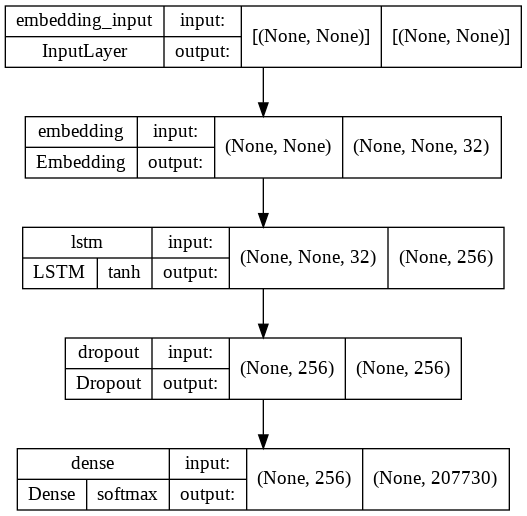

In [ ]:
print(dataX.shape)
print(dataY.shape)
print(len(np.unique(dataY)))
# Lets build model
vocab_size_to_predict = len(tokenizer.word_index)+1

model = Sequential()
model.add(Embedding(input_dim=vocab_size_to_predict, output_dim=32, mask_zero=True))
model.add(LSTM(256, input_shape=(dataX.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(units = vocab_size_to_predict, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True)

In [ ]:
## 9. Train and save the best model on Mini Data here
filepath = "/content/drive/MyDrive/code_completion_data/LSTM_model_full_1.hdf5"
checkpoint1 = ModelCheckpoint(filepath, monitor='loss', verbose=1, 
                             save_best_only=True, mode='min')
history1 = model1.fit(dataX, dataY, epochs=20, batch_size=512, callbacks=[checkpoint1])

Epoch 1/20
19532/19532 [==============================] - ETA: 0s - loss: 2.2182 - accuracy: 0.5967
Epoch 1: loss improved from inf to 2.21819, saving model to /content/drive/MyDrive/code_completion_data/LSTM_model_full_1.hdf5
19532/19532 [==============================] - 5408s 277ms/step - loss: 2.2182 - accuracy: 0.5967
Epoch 2/20
19532/19532 [==============================] - ETA: 0s - loss: 1.3386 - accuracy: 0.7158
Epoch 2: loss improved from 2.21819 to 1.33858, saving model to /content/drive/MyDrive/code_completion_data/LSTM_model_full_1.hdf5
19532/19532 [==============================] - 5417s 277ms/step - loss: 1.3386 - accuracy: 0.7158
Epoch 3/20
19532/19532 [==============================] - ETA: 0s - loss: 1.1552 - accuracy: 0.7445
Epoch 3: loss improved from 1.33858 to 1.15518, saving model to /content/drive/MyDrive/code_completion_data/LSTM_model_full_1.hdf5
19532/19532 [==============================] - 5417s 277ms/step - loss: 1.1552 - accuracy: 0.7445
Epoch 4/20
19532/